## Simplified two-dimensional visualization

Visualizing data from the *dicta* in a simplified two-dimensional form is a useful first step toward understanding how stylometric analysis works in practice. For the purpose of the following discussion, the *dicta* will be divided into four samples:
+ the hypothetical case statements (*dicta initiales* or *themata*) that introduce the thirty-six cases in Part II of the *Decretum*,
+ the first-recension *dicta* from Parts I and II of the *Decretum*,
+ the first- and second-recension *dicta* from *de Penitentia*, and
+ the second-recension *dicta* from Parts I and II of the *Decretum*.

In the following code, tables, and plots, these four samples will be labelled Gratian0, Gratian1, dePen, and Gratian2. The Gratian1 and Gratian2 samples, representing the first- and second-recension *dicta* from Parts I and II of the *Decretum*, were generated according to the procedure detailed in the previous section on corpus preparation.

**Including the dicta from de Penitentia distorts the results of the analysis, because out of the 10,081 words of the vulgate version of the de Pen. dicta, only 556 were added or changed between the first and second recensions of the Decretum.**

In [1]:
import re

def get_tokens(filename):
    '''open text file and return list of tokens'''
    # text = open(filename, 'r').read().lower()
    f = open(filename, 'r') # open file
    text = f.read() # read file
    text = text.lower() # lower-case text
    tokens = [word for word in re.split('\W', text) if word != ''] # remove punctuation
    return tokens

In [2]:
import pandas as pd

def get_lengths(samples):
    filenames = [sample + '.txt' for sample in samples]
    lengths = {}
    for i in range(len(samples)):
       lengths[samples[i]] = len(get_tokens(filenames[i]))
    return pd.DataFrame(lengths, index = ['words'])

samples = ['Gratian0', 'Gratian1', 'dePen', 'Gratian2']
lengths = get_lengths(samples)
lengths

,Gratian0,Gratian1,dePen,Gratian2
words,3605,56713,10081,14255


In [3]:
def get_features(samples):
    tokens = []
    for sample in samples:
        tokens += get_tokens(sample + '.txt')
    types = list(set(tokens))
    tmp = dict.fromkeys(types, 0)
    for token in tokens: tmp[token] += 1
    features = {
        key: value for key, value in sorted(tmp.items(),
        key = lambda item: (-item[1], item[0]))
    }
    return features

# temporarily remove test case from samples
# can't remove permanently until after get_counts()
ignore = 'Gratian0'
features = get_features([sample for sample in samples if sample != ignore])
list(features.keys())[:4] # 4 most frequent words (MFWs)

['in', 'non', 'et', 'est']

In [4]:
def get_counts(features, samples):
    columns = {}
    for sample in samples:
        columns[sample] = []
        tmp = get_features([sample])
        for feature in features:
            columns[sample].append(tmp.get(feature, 0))
    return pd.DataFrame(columns, index = features)

counts = get_counts(list(features.keys())[:4], samples)
counts

,Gratian0,Gratian1,dePen,Gratian2
in,74,1450,252,411
non,24,1360,270,306
et,70,1293,260,345
est,13,965,182,167


**Once we've gotten to this point, we've gathered all the preliminary information we need, and are ready to move the analysis into Pandas dataframes.**

**Explain use of occurrences per 1,000 words instead of percent here. Using occurrences per 1,000 words is more convenient than using percentages, because at that scale the word frequency values we are concerned with (at least most them) are greater than 1.0.**

In [5]:
frequencies = (counts / lengths.values) * 1000
frequencies

,Gratian0,Gratian1,dePen,Gratian2
in,20.527046,25.567330,24.997520,28.831989
non,6.657420,23.980393,26.783057,21.466152
et,19.417476,22.799006,25.791092,24.202034
est,3.606103,17.015499,18.053765,11.715188


This is the point where we need to temporarily drop the Gratian0 column. We're only interested at this point in calculating the mean and sample standard deviation of the values in the two columns we're comparing the candidate to: Gratian1 and Gratian2.

In [6]:
samples.remove(ignore)
selected = frequencies[samples]
selected

,Gratian1,dePen,Gratian2
in,25.567330,24.997520,28.831989
non,23.980393,26.783057,21.466152
et,22.799006,25.791092,24.202034
est,17.015499,18.053765,11.715188


In [7]:
means = selected.mean(axis = 1).to_frame('mean')
means

,mean
in,26.465613
non,24.076534
et,24.264044
est,15.594817


We can graph the number of occurrences of *in* and *non* per 1,000 words in the *dicta*, with the frequency of *in* plotted along the horizontal x-axis, and the frequency of *non* plotted along the vertical y-axis, to produce a simplified visualization of the total variation between the four samples. Means are provided for context: the vertical dashed line represents the mean for the horizontal (*in*) axis, and the horizontal dashed line represents the mean for the vertical (*non*) axis.

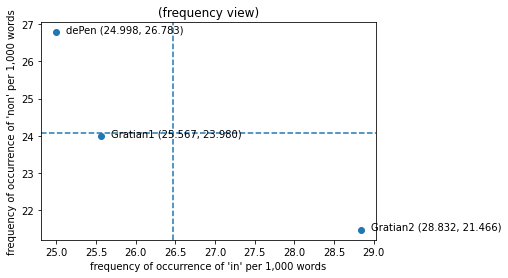

In [8]:
import matplotlib.pyplot as pp

x_values = selected.values[0].tolist()
y_values = selected.values[1].tolist()
pp.scatter(x_values, y_values)
pp.axhline(means['mean'].tolist()[1], linestyle='dashed')
pp.axvline(means['mean'].tolist()[0], linestyle='dashed')
pp.xlabel(f'frequency of occurrence of \'{selected.index.values[0]}\' per 1,000 words')
pp.ylabel(f'frequency of occurrence of \'{selected.index.values[1]}\' per 1,000 words')
labels = list(selected.columns)
for i in range(len(labels)):
    pp.annotate(
        f'{labels[i]} ({x_values[i]:.3f}, {y_values[i]:.3f})',
        (x_values[i], y_values[i]),
        textcoords="offset points",
        xytext=(10,0),
        ha='left'
    )
pp.title('(frequency view)')
# pp.tight_layout()
# pp.savefig('./Figure_0a') # PNG
pp.show()

Figure 0a introduces several conventions common to two-dimensional graphical representations of word frequency data that readers will encounter repeatedly throughout this chapter. The feature (in this case the frequency of occurrence of the word *in*) that explains more of the variation between the samples is plotted along the horizontal x-axis, while the feature (in this case the frequency of occurrence of the word *non*) that explains less of the variation between the samples is plotted along the vertical y-axis. Although this plot, produced by the Matplotlib Python two-dimensional plotting library, is rectangular and the axes are approximately to scale, most of the figures in this chapter were generated using stylo, an R package for stylometric analysis, which outputs square plots. Regardless of appearance, readers should bear in mind that the area plotted is wider than it is tall, that is, that it always displays greater variation between samples horizontally along the x-axis than it does vertically along the y-axis.

Figure 0a plots the values for the first-recension *dicta*, the second-recension *dicta*, the *dicta* from *de Penitentia*, the second-recension *dicta*, and (labelled Gratian1, dePen, and Gratian2 respectively), as well as the means (indicated by the dashed lines), for the frequencies of *in* and *non* per 1,000 words. It is more statistically meaningful, however, to measure and plot the differences between values and means in units of standard deviations rather than frequency per 1,000 words. The difference of a value from the mean divided by standard deviation is referred to as the value's z-score. A value that has a difference of one standard deviation from the mean is said to have a z-score of 1.0 or -1.0 depending on whether the value is greater or lesser than the mean. The formula used to calculate the samples standard deviation is:

$s=\sqrt{\frac{1}{N - 1}\sum_{i=1}^N(x_i-\bar{x})^2}$

![Standard Deviation](stdev.jpg)

The formula is slightly daunting notationally, but it is not difficult to use it to calculate the desired results. **Show every step involved in calculating the sample standard deviation for *in* as an example. Make it clear that $\bar{x}$ is the mean of the means! Calculating the sample standard deviation for *non* is left as an exercise for the reader.** First, we calculate the squared deviations from the mean for the frequency of *in* in the first-recension *dicta*:

$(x_1-\bar{x})^2 = (25.5673 - 26.4656)^2 = (-0.8983)^2 = 0.8069$,

for the frequency of *in* in the *dicta* from *de Penitentia*:

$(x_2-\bar{x})^2 = (24.9975 - 26.4656)^2 = (-1.4681)^2 = 2.1553$,

and for the frequency of *in* in the second-recension *dicta*:

$(x_3-\bar{x})^2 = (28.8320 - 26.4656)^2 = (2.3664)^2 = 5.5997$.

We then sum (as indicated by $\sum$) the three squared deviations from the mean, divide the sum by their number minus one ($N = 3$), and take the square root of the quotient:

$s =
\sqrt{\frac{1}{2}(0.8069 + 2.1553 + 5.5997)} =
\sqrt{\frac{1}{2}(8.5619)} =
\sqrt{4.2810} =
2.0690$

The units of s are the same as those used to calculate the mean, in this case, the frequency of occurrence of a word per 1,000 words.

In [9]:
standard_deviations = selected.std(axis = 1).to_frame('std')
standard_deviations

,std
in,2.069051
non,2.659756
et,1.497007
est,3.399727


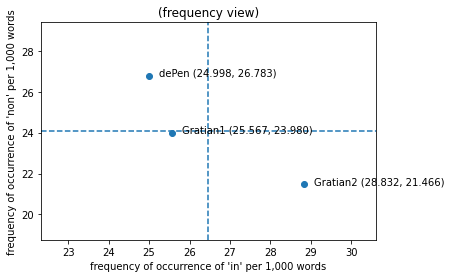

In [10]:
x_values = selected.values[0].tolist()
y_values = selected.values[1].tolist()
pp.scatter(x_values, y_values)
pp.axis([means['mean'].tolist()[0] - 2 * standard_deviations['std'].tolist()[0],
        means['mean'].tolist()[0] + 2 * standard_deviations['std'].tolist()[0],
        means['mean'].tolist()[1] - 2 * standard_deviations['std'].tolist()[1],
        means['mean'].tolist()[1] + 2 * standard_deviations['std'].tolist()[1]])
pp.axhline(means['mean'].tolist()[1], linestyle='dashed')
pp.axvline(means['mean'].tolist()[0], linestyle='dashed')
pp.xlabel(f'frequency of occurrence of \'{selected.index.values[0]}\' per 1,000 words')
pp.ylabel(f'frequency of occurrence of \'{selected.index.values[1]}\' per 1,000 words')
labels = list(selected.columns)
for i in range(len(labels)):
    pp.annotate(
        f'{labels[i]} ({x_values[i]:.3f}, {y_values[i]:.3f})',
        (x_values[i], y_values[i]),
        textcoords="offset points",
        xytext=(10,0),
        ha='left'
    )
pp.title('(frequency view)')
# pp.savefig('./Figure_0a') # PNG
pp.show()

**Again, remember that the means and standard deviations have been computed from the values in the Gratian1 and Gratian2 columns *only*!**

For the frequency of *in* in the first-recension *dicta*:

$z =
\frac{x_1 - \mu}{\sigma} =
\frac{25.5673 - 26.2231}{1.9022} =
\frac{-0.6558}{1.9022} =
-0.3447$

and for the frequency of *in* in the second-recension *dicta*:

$z =
\frac{x_2 - \mu}{\sigma} =
\frac{28.8320 - 26.2231}{1.9022} =
\frac{2.6089}{1.9022} =
1.3716$

Labels on the axes of the plot refer to standard deviations (values
of z) away from the mean (represented by the dashed lines)

$z=\frac{x - \bar{x}}{s}$

![z-score](z-score.jpg)

In [11]:
z_scores = (frequencies - means.values) / standard_deviations.values
z_scores

,Gratian0,Gratian1,dePen,Gratian2
in,-2.870189,-0.434152,-0.709549,1.143701
non,-6.549140,-0.036147,1.017583,-0.981437
et,-3.237506,-0.978645,1.020068,-0.041422
est,-3.526376,0.417881,0.723278,-1.141159


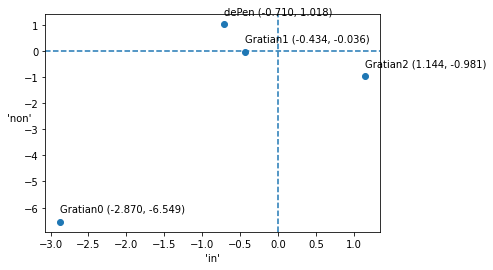

In [12]:
x_values = z_scores.values[0].tolist()
y_values = z_scores.values[1].tolist()
pp.scatter(x_values, y_values)
pp.axhline(linestyle='dashed')
pp.axvline(linestyle='dashed')
pp.xlabel(f'\'{z_scores.index.values[0]}\'')
pp.ylabel(f'\'{z_scores.index.values[1]}\'', rotation = 'horizontal')
labels = list(z_scores.columns)
for i in range(len(labels)):
    pp.annotate(
        f'{labels[i]} ({x_values[i]:.3f}, {y_values[i]:.3f})',
        (x_values[i], y_values[i]),
        textcoords="offset points",
        xytext=(0,10),
        ha='left'
    )
# pp.title('(z-score view)')
# pp.savefig('./Figure_0b') # PNG
# pp.show()

## Burrows's Delta

Attempts to attribute authorship are typically undertaken in scenarios where there is a large (enough) number of texts securely attributable to a known author, and a text, or at most a small number of texts, of unknown authorship. The attempt is then made to attribute the unknown text to the known author, or to rule out such an attribution. Take *The Federalist* as an example. There are numbers of *The Federalist* of disputed or unknown attribution, a small and well-defined number of candidates for authorship --- Hamilton, Jay, Madison --- to whom those numbers might be attributed, and securely attributed samples from each of the candidates, from the same work no less. Such an approach is not possible in the case of the *dicta* from Gratian’s *Decretum*. As the survey in Chapter 3 above indicated, near-contemporaries knew next to nothing about Gratian. Perhaps most notably, although Gratian was thought to have been a teacher, no one in the generation following made an unambiguous claim to have been his student. **There are no other writings securely, or even insecurely, attributed to him.**

This does not mean that we are unable to apply the established techniques of authorship attribution to Gratian’s *dicta*. It simply means that we will have to adapt the tradtional assumptions behind the design of authorship attribution experiments for a different set of circumstances. Every authorship attribution experiment starts from an hypothesis (sometimes implicitly rather than explicitly stated) concerning authorship of the text under consideration. The hypothesis traditional in Gratian studies has been that the *dicta* from the *Decretum* --- defined as the hypothetical case statements (*themata*) plus the first- and second-recension *dicta* including the *dicta* from *de Pen*. --- are the work of a unitary author, the eponymous Gratian, **In this view, the *dicta* represent a complete, closed, corpus -- the total population of words attributable to the author Gratian.**

Now, break the consolidated z-scores dateframe into two dataframes: one for the hypothetical case statements (*themata*), the other for the first- and second recension *dicta* (including the *dicta* from *de Pen*.) with which we want to compare the case statements.

In [13]:
test = z_scores[[ignore]]
corpus = z_scores[samples]
test

,Gratian0
in,-2.870189
non,-6.549140
et,-3.237506
est,-3.526376


$\Delta_B = \frac{1}{N}\sum_{i = 1}^N|z_i(t) - z_i(c)|$

![Burrows's Delta](Burrows.jpg)

In [14]:
# tmp = (corpus - test.values).abs()
tmp = (test.values - corpus).abs()
tmp

,Gratian1,dePen,Gratian2
in,2.436037,2.160640,4.013890
non,6.512993,7.566723,5.567703
et,2.258861,4.257573,3.196083
est,3.944257,4.249654,2.385217


In [15]:
# is there a better way to do this?
deltas = (tmp.mean(axis = 0)).to_frame(ignore).transpose()
deltas

,Gratian1,dePen,Gratian2
Gratian0,3.788037,4.558648,3.790723


Calculating  Burrows's Delta ($\Delta_B$) for Gratian0 with respect to Gratian1 and Gratian2 has limited value. The values of $\Delta_B$ for Gratian0 with respect to both Gratian1 and Gratian2 are the same:

||Gratian1|Gratian2|
|-:|-:|-:|
|**Gratian0**|5.120042|5.120042|

This appears to be related to the problem of mean-of-means comparisons between two samples yielding standard deviations of 1.0 and -1.0.

Adding a third comparison, to the first- and second-recension *dicta* in *de Pen*., makes for a better demo. **Explain and justify the fact that I am separating the first- and second-recension *dicta* in Gratian1 and Gratian2, but keeping them together in dePen.** The values of $\Delta_B$ for Gratian0 with respect to Gratian1, dePen1, and Gratian2 are:

||Gratian1|dePen|Gratian2|
|-:|-:|-:|-:|
|**Gratian0**|3.788037|4.558648|3.790723|

To put those values of $\Delta_B$ in context, if we substitute a 3917-word sample from the pseudo-Augustinian *De vera et falsa penitentia* in place of Gratian0, the values of $\Delta_B$ for pseudo-Augustine with respect to Gratian1, dePen1, and Gratian2 are:

||Gratian1|dePen|Gratian2|
|-:|-:|-:|-:|
|**ps-Aug**|2.691456|1.783147|3.477697|

\[Gratian quotes *De vera et falsa penitentia* extensively in *de Pen*., and the sample was created by concatenating *De Pen*. D.1 c.88, D.3 c.32, D3 c.42, D.3 c.45, D.3 c49, D.5 c.1, D.6 c.1, and D.7 c.6. (This has the incidental advantage of guaranteeing orthographic consistency with the other samples derived from the Friedberg edition.) As noted in Chapter 0 above, *De vera et falsa penitentia* is extremely unlikely to have been written by Gratian. Gratian and pseudo-Augustine had markedly different preferences in postpositive conjunctions: pseudo-Augustine strongly preferred *enim*, while Gratian preferred *autem*. John Wei, *Gratian the Theologian*, 84, describes Gratian's *Decretum* as "the first work to draw on *De vera et falsa penitentia*. **wc -l reports 3918 words, tokenizer reports 3917. Verify that these are all the pseudo-Augustine quotes in *de Pen*. To reproduce March 2014 enim/autem boxplots, use oppose.**\]

In each case, the value of $\Delta_B$ for pseudo-Augustine is *lower* than the corresponding value for Gratian0. Keep in mind that the lowest value of Burrows's Delta ($\Delta_B$) indicates the most likely attribution of authorship. Therefore, pseudo-Augustine is *more* likely than the author of Gratian0 to be author of Gratian1, dePen, and Gratian2 (significantly more likely in the cases of Gratian1 and dePen).

